## Importance Sampling Example

Author: Audrey Olivier 

Date: May 8, 2019

For importance sampling, the function must be written in a way that it can evaluate multiple samples at once.

In [1]:
from UQpy.distributions import Uniform, JointIndependent
from UQpy.sampling import ImportanceSampling
import time
import matplotlib.pyplot as plt
import numpy as np

/opt/anaconda3/envs/UQpy_39/lib/python3.9/site-packages/beartype/_util/hint/pep/utilpeptest.py:396: BeartypeDecorHintPepDeprecatedWarning: Type hint typing.Callable deprecated by PEP 585. To resolve this, globally replace this hint by the equivalent PEP 585 type hint (e.g., "typing.List[int]" by "list[int]"). See also:
    https://www.python.org/dev/peps/pep-0585
  warn(warning_message, BeartypeDecorHintPepDeprecatedWarning)
/opt/anaconda3/envs/UQpy_39/lib/python3.9/site-packages/beartype/_util/hint/pep/utilpeptest.py:396: BeartypeDecorHintPepDeprecatedWarning: Type hint typing.Callable deprecated by PEP 585. To resolve this, globally replace this hint by the equivalent PEP 585 type hint (e.g., "typing.List[int]" by "list[int]"). See also:
    https://www.python.org/dev/peps/pep-0585
  warn(warning_message, BeartypeDecorHintPepDeprecatedWarning)
The selected optimizer method does not support bounds and thus will be ignored.
The selected optimizer method does not support bounds and thus

In [2]:
def log_Rosenbrock(x, param):
    return (-(100 * (x[:, 1] - x[:, 0] ** 2) ** 2 + (1 - x[:, 0]) ** 2) / param)

In [3]:
proposal = JointIndependent([Uniform(loc=-8, scale=16), Uniform(loc=-10, scale=60)])
print(proposal.get_parameters())

{'loc_0': -8, 'scale_0': 16, 'loc_1': -10, 'scale_1': 60}


### Run IS

0.0034360885620117188
(1000, 2)


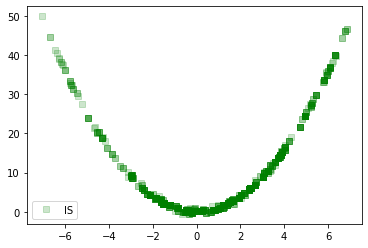

In [4]:
t4 = time.time()


w = ImportanceSampling(log_pdf_target=log_Rosenbrock, args_target=(20,), proposal=proposal, nsamples=10000)

t_IS = time.time() - t4
print(t_IS)

w.resample(nsamples=1000)
plt.plot(w.unweighted_samples[:, 0], w.unweighted_samples[:, 1], 'gs', alpha=0.2)
print(w.unweighted_samples.shape)
plt.legend(['IS'])
plt.show()

### Run IS by adding samples: call the run method in a loop (one can also look at diagnostics)

(5000, 2)
(10000, 2)
(15000, 2)
(20000, 2)
0.010360956192016602


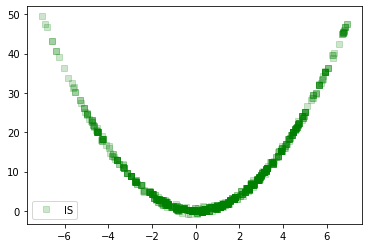

In [5]:
t4 = time.time()

w = ImportanceSampling(log_pdf_target = log_Rosenbrock, args_target = (20,), proposal = proposal)
for nsamples in [5000, 5000, 5000, 5000]:
    w.run(nsamples)
    print(w.samples.shape)
    # IS_diagnostics(weights=w.weights, graphics=False)
t_IS = time.time() - t4
print(t_IS)

w.resample(nsamples=1000)
plt.plot(w.unweighted_samples[:, 0], w.unweighted_samples[:, 1], 'gs', alpha=0.2)
plt.legend(['IS'])
plt.show()

Another example: sampling from a bivariate with copula dependence. Giving a random state enforces that results are the same for repeatability.

In [6]:
from UQpy.distributions import Normal, Gumbel, JointCopula
dist_true = JointCopula(marginals=[Normal(), Normal()], copula=Gumbel(theta=2.))
proposal1 = JointIndependent(marginals=[Normal(), Normal()])

sampler = ImportanceSampling(log_pdf_target = dist_true.log_pdf,proposal = proposal1, random_state = 123,
                             nsamples=500)
print(sampler.samples.shape)
print(sampler.weights.shape)
print(np.round(sampler.samples[-5:], 4))

(500, 2)
(500,)
[[ 0.5679  0.6348]
 [ 0.513   1.0699]
 [-0.0269 -0.9093]
 [ 0.3116  0.4703]
 [-0.1421 -1.1114]]
